<a href="https://colab.research.google.com/github/central209/CS4410/blob/main/brokaw_irisdataset_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
# IMPORTS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# from matplotlib.ticker import NullFormatter
# import seaborn as sns

In [ ]:
iris = load_iris()

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target.shape

(150,)

In [ ]:
X = iris.data
y = iris.target

In [ ]:
# SPLIT FOR TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(
     iris.data, iris.target, random_state=11)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(estimator=knn, X=iris.data, y=iris.target, cv=10)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=19; mean accuracy=97.33%; standard deviation=3.27%
k=21; mean accuracy=96.67%; standard deviation=3.33%
k=23; mean accuracy=97.33%; standard deviation=3.27%
k=25; mean accuracy=96.67%; standard deviation=3.33%
k=27; mean accuracy=96.67%; standard deviation=4.47%
k=29; mean accuracy=95.33%; standard deviation=4.27%


In [ ]:
# https://stackoverflow.com/questions/62003285/how-can-we-find-the-optimum-k-value-in-k-nearest-neighbor

accuracies=[]
k_range = range(1, 31)
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# print(grid.cv_results_.keys())
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

accuracies=grid.cv_results_['mean_test_score']
accuracies=list(accuracies)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


Text(0.5, 1.0, 'Value of K for KNN vs. Cross-Validated Accuracy')

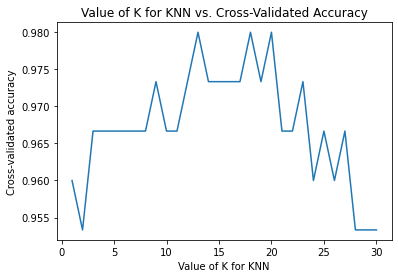

In [ ]:
#plot 'Value of K for KNN' vs. 'Cross-Validated Accuracy'

plt.plot(k_range, accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')

Text(0.5, 1.0, 'Value of K for KNN vs. Cross-Validated Accuracy')

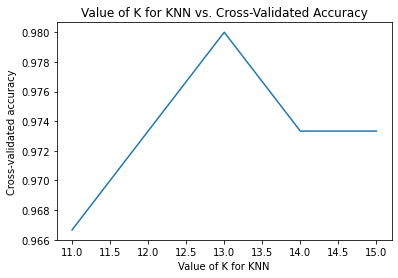

In [ ]:
plt.plot(k_range[10:15], accuracies[10:15])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')